# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. C помощью этих данных определим ключевые параметры объектов недвижимости, влияющие на рыночную стоимость, и с помощью них научимся оценивать её оценивать.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных, например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откроем файл с данными и изучим общую информацию. 

In [1]:
import pandas as pd

data = pd.read_csv('datasets/real_estate_data.csv', sep='\t')

In [2]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

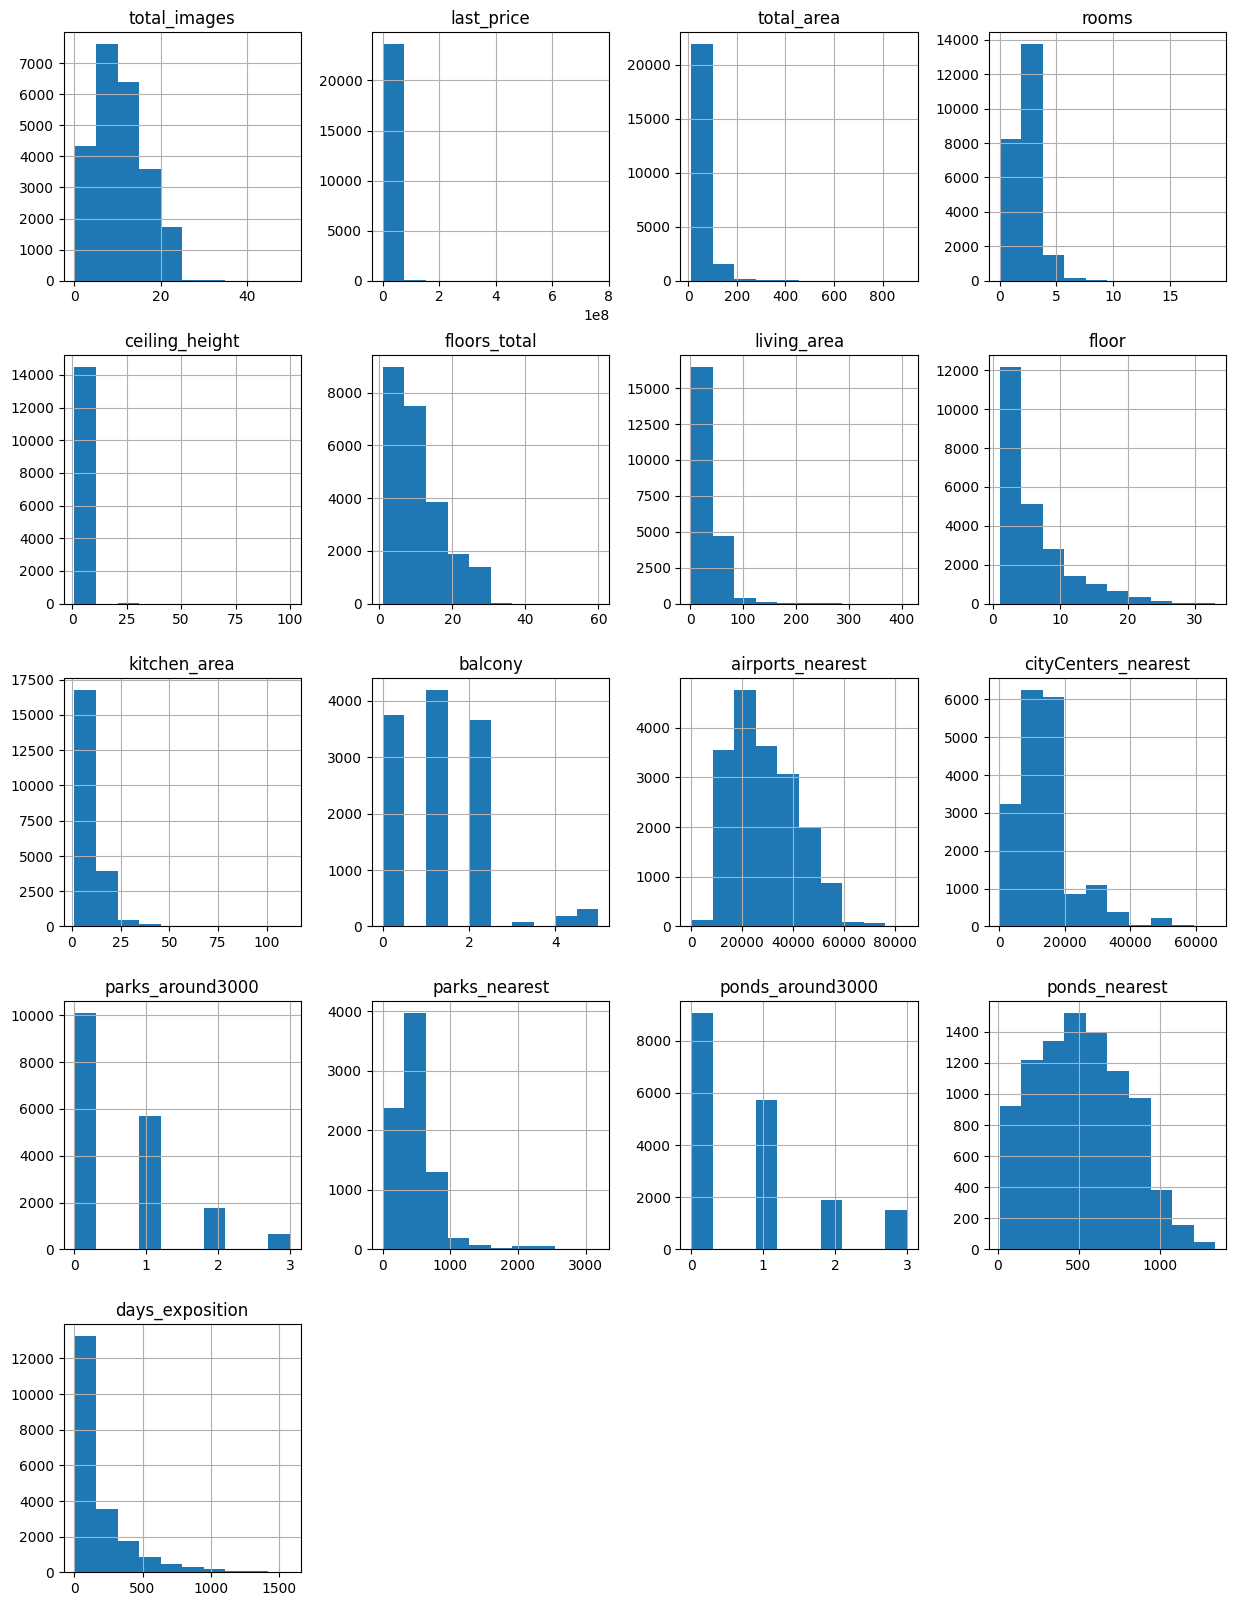

In [4]:
data.hist(figsize=(15, 20));

### Предобработка данных

Изучим количество пропущенных данных

In [5]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

#### Предобработка высоты потолков

Вычислим числов строк с отсутствующей информацией о высоте потолков

In [6]:
data['ceiling_height'].isna().sum()

9195

Посчитаем среднее и медианное значения для высот потолков в имеющихся данных

In [7]:
print('Среднее значение равно', data['ceiling_height'].mean(), 'м, медианное равно', data['ceiling_height'].median(), 'м.')

Среднее значение равно 2.77149889685604 м, медианное равно 2.65 м.


Данные выглядят правдоподобно, теперь получим уникальные значения высот потолков в датафрейме.

In [8]:
data.sort_values('ceiling_height')['ceiling_height'].unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

Получили странные значения для высот потолков(менее 2 метров и очень большие, вплоть до 100 метров), изучим подробнее строки с такими аномалиями.

In [9]:
for height in sorted(data[(data['ceiling_height'] < 2) | (data['ceiling_height'] > 5)]['ceiling_height'].unique()):
    print('Для квартир с высотой потолков', height, 'м средняя площадь составляет', data.query('ceiling_height == @height')['total_area'].mean(), 'м')
    display(data.query('ceiling_height == @height'))
    print('-----------------------------------')
    print()

Для квартир с высотой потолков 1.0 м средняя площадь составляет 55.0 м


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22590,16,6000000.0,55.0,2018-10-31T00:00:00,2,1.0,12.0,32.4,7,NaN,...,10.0,NaN,Санкт-Петербург,33053.0,14217.0,2.0,293.0,2.0,289.0,13.0


-----------------------------------

Для квартир с высотой потолков 1.2 м средняя площадь составляет 42.8 м


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5712,5,1500000.0,42.8,2017-08-14T00:00:00,2,1.2,2.0,27.5,1,NaN,...,5.2,NaN,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0


-----------------------------------

Для квартир с высотой потолков 1.75 м средняя площадь составляет 40.0 м


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
16934,5,4100000.0,40.0,2017-10-17T00:00:00,1,1.75,37.0,17.4,5,NaN,...,8.34,NaN,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0


-----------------------------------

Для квартир с высотой потолков 5.2 м средняя площадь составляет 280.3 м


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
464,15,66571000.0,280.3,2015-06-11T00:00:00,6,5.2,8.0,159.5,7,NaN,...,21.1,0.0,Санкт-Петербург,26316.0,6655.0,3.0,187.0,1.0,616.0,578.0


-----------------------------------

Для квартир с высотой потолков 5.3 м средняя площадь составляет 180.0 м


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1026,20,155000000.0,310.0,2018-10-12T00:00:00,5,5.3,3.0,190.0,3,NaN,...,63.0,2.0,Санкт-Петербург,24899.0,4785.0,0.0,NaN,1.0,603.0,NaN
12628,14,3900000.0,50.0,2018-03-29T00:00:00,1,5.3,5.0,NaN,5,NaN,...,NaN,NaN,Санкт-Петербург,19644.0,3918.0,1.0,505.0,1.0,92.0,8.0


-----------------------------------

Для квартир с высотой потолков 5.5 м средняя площадь составляет 143.0 м


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
7578,17,38000000.0,143.0,2017-11-02T00:00:00,3,5.5,5.0,83.0,5,NaN,...,29.0,1.0,Санкт-Петербург,26333.0,6448.0,3.0,479.0,0.0,NaN,NaN


-----------------------------------

Для квартир с высотой потолков 5.6 м средняя площадь составляет 399.0 м


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1388,20,59800000.0,399.0,2015-01-21T00:00:00,5,5.6,6.0,NaN,6,NaN,...,NaN,0.0,Санкт-Петербург,26204.0,6934.0,2.0,149.0,2.0,577.0,719.0


-----------------------------------

Для квартир с высотой потолков 5.8 м средняя площадь составляет 71.0 м


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21227,0,8200000.0,71.0,2017-07-21T00:00:00,0,5.8,5.0,68.0,5,NaN,...,NaN,0.0,Санкт-Петербург,20170.0,1261.0,2.0,295.0,3.0,366.0,30.0


-----------------------------------

Для квартир с высотой потолков 6.0 м средняя площадь составляет 187.6 м


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
20264,17,119000000.0,187.6,2017-07-10T00:00:00,4,6.0,7.0,147.0,7,NaN,...,15.6,NaN,Санкт-Петербург,26902.0,5605.0,3.0,484.0,1.0,305.0,259.0


-----------------------------------

Для квартир с высотой потолков 8.0 м средняя площадь составляет 50.333333333333336 м


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3474,3,1400000.0,30.0,2018-03-16T00:00:00,1,8.0,5.0,15.3,2,False,...,7.3,NaN,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.0
15743,14,5600000.0,67.0,2016-11-11T00:00:00,3,8.0,16.0,41.0,1,NaN,...,8.0,NaN,Санкт-Петербург,32691.0,11035.0,1.0,723.0,0.0,NaN,474.0
17442,0,5350000.0,54.0,2015-06-16T00:00:00,2,8.0,5.0,29.0,2,NaN,...,NaN,1.0,Красное Село,24638.0,28062.0,0.0,NaN,0.0,NaN,469.0


-----------------------------------

Для квартир с высотой потолков 8.3 м средняя площадь составляет 45.0 м


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5863,20,5650000.0,45.0,2018-08-15T00:00:00,1,8.3,16.0,19.3,14,NaN,...,8.3,1.0,Санкт-Петербург,13069.0,10763.0,0.0,NaN,1.0,613.0,14.0


-----------------------------------

Для квартир с высотой потолков 10.3 м средняя площадь составляет 45.0 м


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22309,20,5300000.0,45.0,2017-09-30T00:00:00,1,10.3,16.0,15.5,15,NaN,...,NaN,NaN,Санкт-Петербург,36353.0,11936.0,2.0,440.0,2.0,450.0,136.0


-----------------------------------

Для квартир с высотой потолков 14.0 м средняя площадь составляет 56.4 м


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
15061,19,5600000.0,56.4,2018-05-11T00:00:00,2,14.0,14.0,32.4,5,NaN,...,9.1,2.0,Санкт-Петербург,14814.0,13610.0,0.0,NaN,0.0,NaN,315.0


-----------------------------------

Для квартир с высотой потолков 20.0 м средняя площадь составляет 92.9 м


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
17496,15,6700000.0,92.9,2019-02-19T00:00:00,3,20.0,17.0,53.2,14,NaN,...,12.0,5.0,Санкт-Петербург,16295.0,15092.0,1.0,967.0,0.0,NaN,NaN


-----------------------------------

Для квартир с высотой потолков 22.6 м средняя площадь составляет 60.0 м


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
20507,12,5950000.0,60.0,2018-02-19T00:00:00,2,22.6,14.0,35.0,11,NaN,...,13.0,1.0,Санкт-Петербург,27028.0,12570.0,0.0,NaN,0.0,NaN,40.0


-----------------------------------

Для квартир с высотой потолков 24.0 м средняя площадь составляет 30.5 м


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5076,0,3850000.0,30.5,2018-10-03T00:00:00,1,24.0,5.0,19.5,1,True,...,5.5,NaN,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0


-----------------------------------

Для квартир с высотой потолков 25.0 м средняя площадь составляет 43.08571428571429 м


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3600000.0,55.2,2018-07-12T00:00:00,2,25.0,5.0,32.0,2,False,...,NaN,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
4643,0,4300000.0,45.0,2018-02-01T00:00:00,2,25.0,9.0,30.0,2,NaN,...,7.0,1.0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
6246,6,3300000.0,44.4,2019-03-25T00:00:00,2,25.0,5.0,31.3,5,NaN,...,5.7,NaN,Кронштадт,68923.0,50649.0,1.0,417.0,2.0,73.0,NaN
9379,5,3950000.0,42.0,2017-03-26T00:00:00,3,25.0,5.0,30.0,2,NaN,...,5.2,NaN,Санкт-Петербург,11647.0,13581.0,0.0,NaN,0.0,NaN,NaN
11285,0,1950000.0,37.0,2019-03-20T00:00:00,1,25.0,5.0,17.0,4,False,...,9.0,2.0,Луга,NaN,NaN,NaN,NaN,NaN,NaN,18.0
14382,9,1700000.0,35.0,2015-12-04T00:00:00,1,25.0,5.0,20.0,2,False,...,8.0,1.0,поселок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,206.0
18545,6,3750000.0,43.0,2019-03-18T00:00:00,2,25.0,5.0,29.0,3,False,...,NaN,NaN,Санкт-Петербург,27054.0,8033.0,1.0,540.0,0.0,NaN,12.0


-----------------------------------

Для квартир с высотой потолков 26.0 м средняя площадь составляет 50.0 м


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5669,4,4400000.0,50.0,2017-08-08T00:00:00,2,26.0,9.0,21.3,3,NaN,...,7.0,2.0,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267.0


-----------------------------------

Для квартир с высотой потолков 27.0 м средняя площадь составляет 57.5 м


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
4876,7,3000000.0,25.0,2017-09-27T00:00:00,0,27.0,25.0,17.0,17,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
5246,0,2500000.0,54.0,2017-10-13T00:00:00,2,27.0,5.0,30.0,3,NaN,...,9.0,2.0,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0
5807,17,8150000.0,80.0,2019-01-09T00:00:00,2,27.0,36.0,41.0,13,NaN,...,12.0,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
10773,8,3800000.0,58.0,2017-10-13T00:00:00,2,27.0,10.0,30.1,3,False,...,8.1,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,71.0
17857,1,3900000.0,56.0,2017-12-22T00:00:00,3,27.0,5.0,33.0,4,False,...,NaN,NaN,Санкт-Петербург,41030.0,15543.0,0.0,NaN,0.0,NaN,73.0
20478,11,8000000.0,45.0,2017-07-18T00:00:00,1,27.0,4.0,22.0,2,NaN,...,10.0,1.0,Санкт-Петербург,18975.0,3246.0,0.0,NaN,3.0,449.0,429.0
21824,20,2450000.0,44.0,2019-02-12T00:00:00,2,27.0,2.0,38.0,2,False,...,8.6,2.0,городской поселок Большая Ижора,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22938,14,4000000.0,98.0,2018-03-15T00:00:00,4,27.0,2.0,73.0,2,True,...,9.0,1.0,деревня Нижняя,NaN,NaN,NaN,NaN,NaN,NaN,27.0


-----------------------------------

Для квартир с высотой потолков 27.5 м средняя площадь составляет 42.0 м


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21377,19,4900000.0,42.0,2017-04-18T00:00:00,1,27.5,24.0,37.7,19,False,...,11.0,2.0,Санкт-Петербург,42742.0,9760.0,0.0,NaN,0.0,NaN,61.0


-----------------------------------

Для квартир с высотой потолков 32.0 м средняя площадь составляет 83.7 м


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3148,14,2900000.0,75.0,2018-11-12T00:00:00,3,32.0,3.0,53.0,2,NaN,...,8.0,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22336,19,9999000.0,92.4,2019-04-05T00:00:00,2,32.0,6.0,55.5,5,False,...,16.5,4.0,Санкт-Петербург,18838.0,3506.0,0.0,NaN,3.0,511.0,NaN


-----------------------------------

Для квартир с высотой потолков 100.0 м средняя площадь составляет 25.0 м


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22869,0,15000000.0,25.0,2018-07-25T00:00:00,1,100.0,5.0,14.0,5,True,...,11.0,5.0,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0


-----------------------------------



Выводы:
1. Квартир с потолками ниже 2м всего 3 (три), эти строки не имеют значительного влияния на общую выборку, но тем не менее стоит заменить эти значения на медианные.
1. Квартиры с потолками от 5 до 6 м зачастую имеют достаточно высокую площадь, поэтому эти данные можно оставить без изменений.
1. В строках с потолками свыше 6 м зачастую небольшая общая площадь и скорее всего это ошибочные данные. Для высот от 20 до 32 м можно предположить, что при обработке данных была потерян разделяющий разряды знак (2.0 и 3.2 м), но в виду небольшого количества таких данных их все можно заменить медианными значениями без искажения общей выборки.

Изучим строки, для которых пропущены значения с высотами потолков.

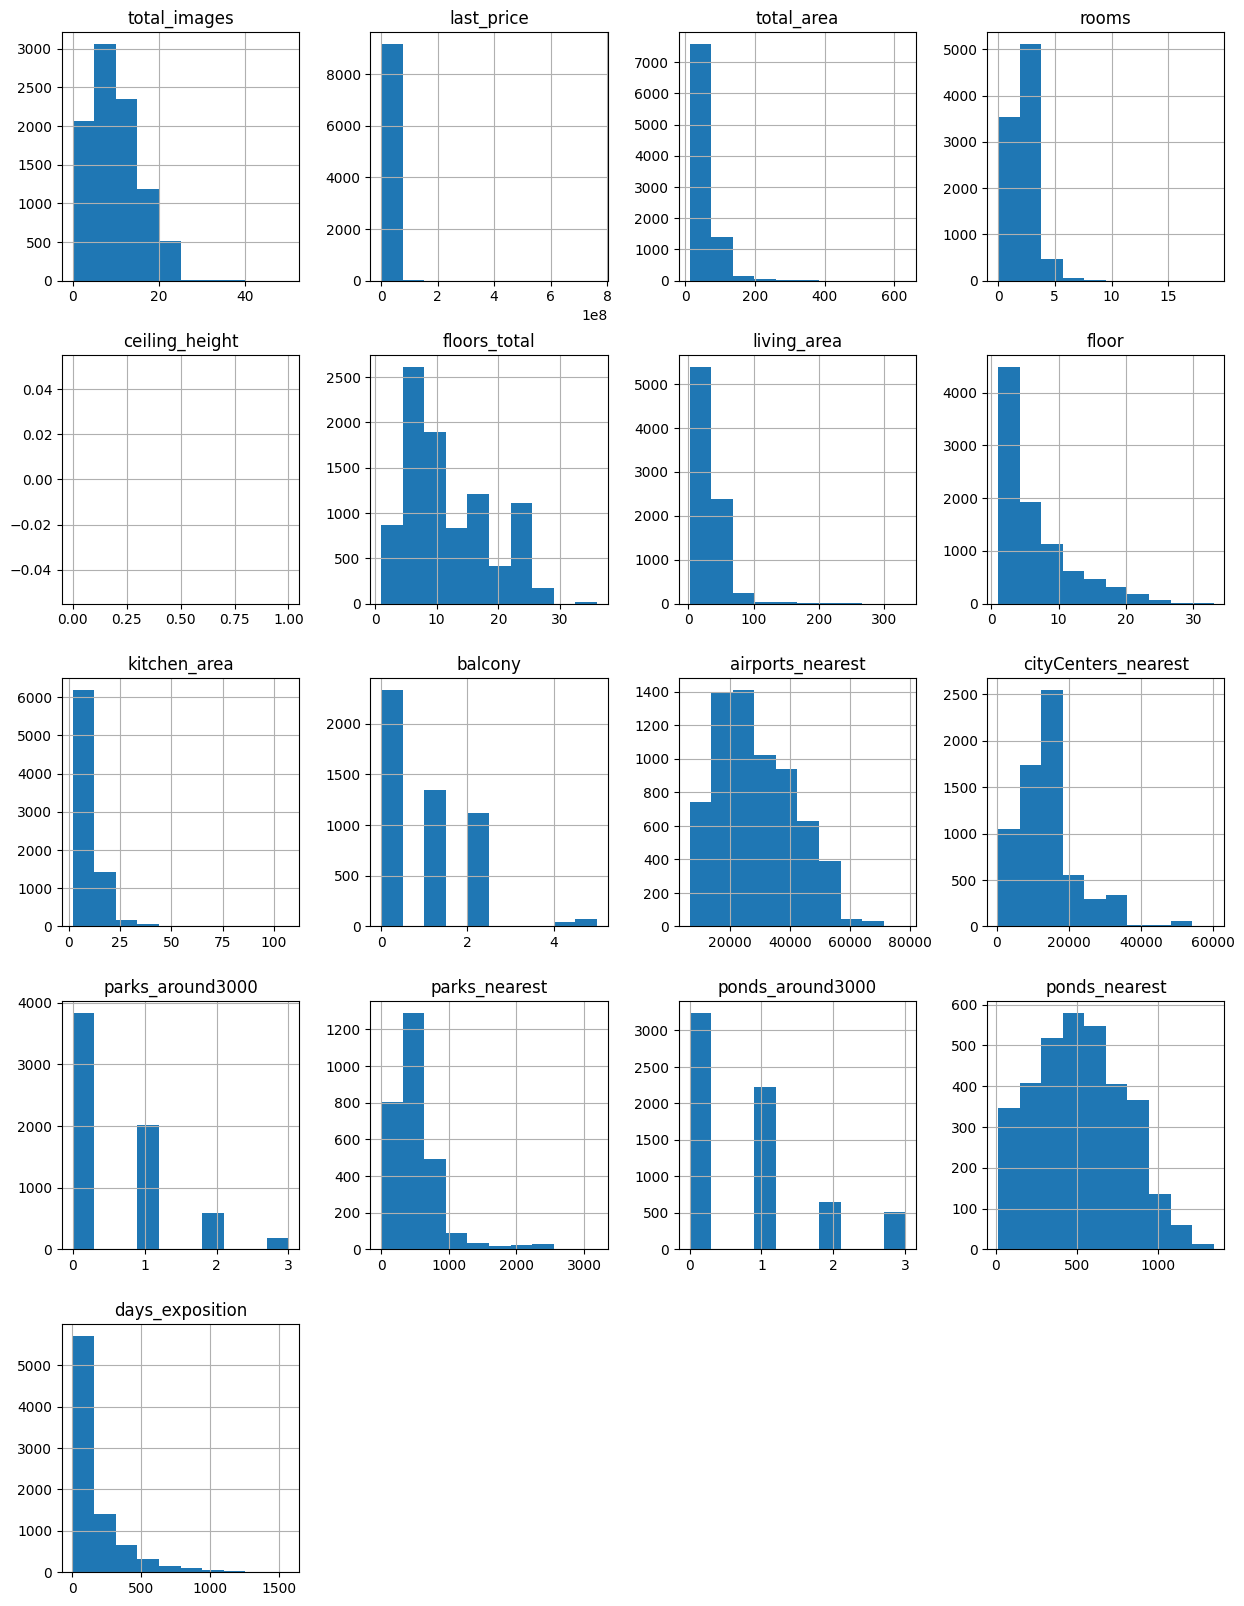

In [10]:
data[data['ceiling_height'].isna()].hist(figsize=(15, 20));

На первый взгляд эти гистограммы аналогичны гистограммам по общей выборке, поэтому пропущенные значения для высоты потолков также заполним медианными значениями.

In [11]:
data.loc[(data['ceiling_height'].isna()) | (data['ceiling_height'] < 2) | (data['ceiling_height'] > 6), 'ceiling_height'] = data['ceiling_height'].median()


Проверим внесённые изменения:

In [12]:
data['ceiling_height'].isna().sum()

0

In [13]:
data.sort_values('ceiling_height')['ceiling_height'].unique()

array([2.  , 2.2 , 2.25, 2.3 , 2.34, 2.4 , 2.45, 2.46, 2.47, 2.48, 2.49,
       2.5 , 2.51, 2.52, 2.53, 2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6 ,
       2.61, 2.62, 2.63, 2.64, 2.65, 2.66, 2.67, 2.68, 2.69, 2.7 , 2.71,
       2.72, 2.73, 2.74, 2.75, 2.76, 2.77, 2.78, 2.79, 2.8 , 2.81, 2.82,
       2.83, 2.84, 2.85, 2.86, 2.87, 2.88, 2.89, 2.9 , 2.91, 2.92, 2.93,
       2.94, 2.95, 2.96, 2.97, 2.98, 2.99, 3.  , 3.01, 3.02, 3.03, 3.04,
       3.05, 3.06, 3.07, 3.08, 3.09, 3.1 , 3.11, 3.12, 3.13, 3.14, 3.15,
       3.16, 3.17, 3.18, 3.2 , 3.21, 3.22, 3.23, 3.24, 3.25, 3.26, 3.27,
       3.28, 3.29, 3.3 , 3.31, 3.32, 3.33, 3.34, 3.35, 3.36, 3.37, 3.38,
       3.39, 3.4 , 3.42, 3.43, 3.44, 3.45, 3.46, 3.47, 3.48, 3.49, 3.5 ,
       3.51, 3.52, 3.53, 3.54, 3.55, 3.56, 3.57, 3.58, 3.59, 3.6 , 3.62,
       3.63, 3.65, 3.66, 3.67, 3.68, 3.69, 3.7 , 3.75, 3.76, 3.78, 3.8 ,
       3.82, 3.83, 3.84, 3.85, 3.86, 3.87, 3.88, 3.9 , 3.93, 3.95, 3.98,
       4.  , 4.06, 4.1 , 4.14, 4.15, 4.19, 4.2 , 4.

Для данных с высотой потолка заменим тип данных на float32.

In [14]:
data['ceiling_height'] = data['ceiling_height'].astype('float32')

#### Предобработка общего количества этажей в доме

Изучим строки с пропущенными значениями количеств этажей в доме.

In [15]:
data[data['floors_total'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,2.65,NaN,30.80,4,NaN,...,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,2.65,NaN,20.75,1,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,2.65,NaN,38.40,12,NaN,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,2.65,NaN,47.10,8,NaN,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,2.65,NaN,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000.0,63.5,2017-05-24T00:00:00,2,2.80,NaN,NaN,3,NaN,...,NaN,NaN,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
22656,4,4574160.0,64.5,2017-04-02T00:00:00,2,2.65,NaN,31.70,20,NaN,...,14.40,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22808,0,14569263.0,110.4,2016-11-20T00:00:00,3,2.65,NaN,45.38,6,NaN,...,23.42,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0
23590,0,21187872.0,123.3,2017-04-25T00:00:00,3,2.65,NaN,50.40,18,NaN,...,23.60,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0


Вероятнее всего данные пропустили из-за того, что квартира находится на последнем этаже и эту информацию посчитали излишней (пропуски о номере этажа отсутствуют).
Количество строк с пропущенными данными - 86, поэтому такие изменения не исказят общую выборку.

In [16]:
data.loc[data['floors_total'].isna(), 'floors_total'] = data['floor']

Изменим тип данных на целочисленный.

In [17]:
data['floors_total'] = data['floors_total'].astype('int') 

Обратим внимание, что в датафрейме отсутствует информация о типе этажа(первый, последний, другой)

In [18]:
data.loc[data['floor'] == 1, 'floor_type'] = 'первый'
data.loc[data['floor'] == data['floors_total'], 'floor_type'] = 'последний'
data.loc[data['floor_type'].isna(), 'floor_type'] = 'другой'

#### Предобработка жилой площади и площади кухни
Получим количество строк с пропущенными данными

In [19]:
data['living_area'].isna().sum()

1903

In [20]:
data['kitchen_area'].isna().sum()

2278

Изучим строки с пропусками в жилой площади

In [21]:
data[data['living_area'].isna()][['total_area', 'living_area', 'kitchen_area']]

,total_area,living_area,kitchen_area
3,159.00,NaN,NaN
7,71.60,NaN,18.9
30,32.80,NaN,NaN
37,45.80,NaN,NaN
44,40.00,NaN,NaN
...,...,...,...
23642,80.30,NaN,NaN
23663,88.00,NaN,NaN
23670,45.60,NaN,NaN
23679,35.00,NaN,NaN


Видно, что в некоторых строках есть данные об общей площади и площади кухни, а значит жилую площадь можно рассчитать как их разницу.

In [22]:
data.loc[data['living_area'].isna(), 'living_area'] = data['total_area'] - data['kitchen_area']

Изучим строки с пропусками в площади кухни.

In [23]:
data[data['kitchen_area'].isna()][['total_area', 'living_area', 'kitchen_area']]

,total_area,living_area,kitchen_area
3,159.0,NaN,NaN
30,32.8,NaN,NaN
37,45.8,NaN,NaN
44,40.0,NaN,NaN
59,46.5,NaN,NaN
...,...,...,...
23655,40.5,19.6,NaN
23663,88.0,NaN,NaN
23670,45.6,NaN,NaN
23679,35.0,NaN,NaN


Аналогично рассчитаем площадь кухни для строк, где указана жилая площадь.

In [24]:
data.loc[data['kitchen_area'].isna(), 'kitchen_area'] = data['total_area'] - data['living_area']

Вновь посмотрим на количество пропусков в жилой площади и площади кухни.

In [25]:
data['living_area'].isna().sum()

1464

In [26]:
data['kitchen_area'].isna().sum()

1464

Проверим совпадают ли строки с пропусками в жилой площади с пропусками в площади кухни.

In [27]:
print(list(data['living_area'].isna()) == list(data['kitchen_area'].isna()))

True


Для оставшихся пропущенных значений рассчитаем среднюю долю жилой площади к общей (т.к. пропусков в жилой площади меньше).

In [28]:
living_to_total = data['living_area'].sum() / data['total_area'].sum()
print(living_to_total)

0.5427305530653878


Исходя из наших данных, получает что на жилую площадь в средне приходится 54% общей площади, используем это значения для рассчёта пропусков в жилой площади.

In [29]:
data.loc[data['living_area'].isna(), 'living_area'] = round(data['total_area'] * living_to_total, 2)

Вновь рассчитаем площадь кужни как разницу обшей площади и жилой.

In [30]:
data.loc[data['kitchen_area'].isna(), 'kitchen_area'] = data['total_area'] - data['living_area']

Снова проверим наличие пропусков в жилой площади и площади кухни

In [31]:
data['living_area'].isna().sum()

0

In [32]:
data['kitchen_area'].isna().sum()

0

Заменим тип данных для общей, жилой и площади кухни на float32.

In [33]:
data['total_area'] = data['total_area'].astype('float32')
data['living_area'] = data['living_area'].astype('float32')
data['kitchen_area'] = data['kitchen_area'].astype('float32')

#### Предобработка типа апартаменты.
Пропусков в этом поле более 20 тыс. (почти 90%), скорее всего для апартаментов этот тип уже указан, а остальные объекты недвижимости к нему не относятся и для них по умолчанию можно поставить $False$.

In [34]:
data.loc[data['is_apartment'].isna(), 'is_apartment'] = False

#### Предобработка количества балконов
Данные о количестве балконов пропущены более чем в половине строк, предположение, что в половине продаваемых квартир нет балконов, мало реалистично, поэтому приведём значения количества балконов к целочисленным, а пропуски оставим без изменений.

In [35]:
data['balcony'] = pd.array(data['balcony'], dtype=pd.Int32Dtype())

#### Предобработка названий населённого пункта

Пропусков в названии населённого пункта всего 49, скорее всеого эти строки относятся к г. Санкт_петербург, но мы заменим пропуски на 'не указан'.

In [36]:
data.loc[data['locality_name'].isna(), 'locality_name'] = 'не указан'

Исследуем уникальные значения в названиях населённых пунктов.

In [37]:
data.sort_values('locality_name')['locality_name'].unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [38]:
len(data.sort_values('locality_name')['locality_name'].unique())

365

Избавимся от неявных дубликатов в названиях населённых пунктов.

In [39]:
patterns = ['городской поселок', 'городской посёлок', 'поселок', 'посёлок городского типа', 'поселок станции', 'посёлок станции', 'посёлок при железнодорожной станции']

for pattern in patterns:
    data.loc[data['locality_name'].str.contains(pattern), 'locality_name'] = data['locality_name'].str.replace(pattern, 'посёлок')

In [40]:
len(data.sort_values('locality_name')['locality_name'].unique())

320

In [41]:
data.sort_values('locality_name')['locality_name'].unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня Большой Сабск', 'деревня Бор',
       'деревня Борисова Грива', 'деревня Ваганово', 'деревня Вартемяги',
       'деревня Вахнова Кара', 'деревня Выскатка

#### Предобработка расстояний до аэропорта
Изучим информацию о населённых пунктах, где пропущена информация о расстоянии до аэропорта.

In [42]:
data[data['airports_nearest'].isna()].groupby('locality_name')['last_price'].count()

locality_name
Бокситогорск             16
Волосово                 36
Волхов                  111
Всеволожск              398
Выборг                  237
                       ... 
село Путилово             2
село Рождествено          3
село Русско-Высоцкое      9
село Старая Ладога        2
село Шум                  1
Name: last_price, Length: 301, dtype: int64

In [43]:
len(data[data['locality_name'] == 'Бокситогорск'])

16

На примере Бокситогорска видно, что для всех обьявлений в этом городе отсутствует информация о расстоянии до аэропорта, а значит не откуда позаимстовать эту информацию, поэтому изучим пропуски только для г. Санкт-Петербург.

In [44]:
len(data[(data['airports_nearest'].isna()) & (data['locality_name'] == 'Санкт-Петербург')])

85

In [45]:
len(data[data['locality_name'] == 'Санкт-Петербург'])

15721

Доля пропусков не значительна, поэтому заполним их медианными значениями по г. Санкт-Петербург.

In [46]:
data.loc[(data['airports_nearest'].isna()) & (data['locality_name'] == 'Санкт-Петербург'), 'airports_nearest'] = data[data['locality_name'] == 'Санкт-Петербург']['airports_nearest'].median()

Приведём эти значения к типу float32.

In [47]:
data['airports_nearest'] = pd.array(data['airports_nearest'], dtype=pd.Float32Dtype())

#### Предобработка расстояний до центра города
Скорее всего данный столбец актуален только для г. Санкт-Петербург, на примере того же Бокситогорска можно показать, что эта информация отсутствует во всех объявлениях этого города, оценим количество пропущенных значений в этом столбце для г. Санкт-Петербург и общее кол-во объявлений в этом городе.

In [48]:
len(data[(data['cityCenters_nearest'].isna()) & (data['locality_name'] == 'Санкт-Петербург')])

61

In [49]:
len(data[data['locality_name'] == 'Санкт-Петербург'])

15721

Доля пропущенных значений не существенна, поэтому для г. Санкт-Петербург заполним пропуски медианными значениями.

In [50]:
data.loc[(data['cityCenters_nearest'].isna()) & (data['locality_name'] == 'Санкт-Петербург'), 'cityCenters_nearest'] = data[data['locality_name'] == 'Санкт-Петербург']['cityCenters_nearest'].median()

Приведём эти значения к целочисленному типу.

#### Предобработка числа парков и водоёмов.
Оценим количество объявлений в г. Санкт-Петербург с пропусками в этих столбцах, а также кол-во строк, где кол-во парков и водоёмов равно нулю.

In [51]:
len(data[(data['parks_around3000'].isna()) & (data['locality_name'] == 'Санкт-Петербург')])

61

In [52]:
len(data[(data['parks_around3000'] == 0) & (data['locality_name'] == 'Санкт-Петербург')])

8380

In [53]:
len(data[(data['parks_nearest'].isna()) & (data['locality_name'] == 'Санкт-Петербург')])

8437

In [54]:
len(data[(data['ponds_around3000'].isna()) & (data['locality_name'] == 'Санкт-Петербург')])

61

In [55]:
len(data[(data['ponds_around3000'] == 0) & (data['locality_name'] == 'Санкт-Петербург')])

7677

In [56]:
len(data[(data['ponds_nearest'].isna()) & (data['locality_name'] == 'Санкт-Петербург')])

7738

Получили, что информация о кол-ве парков и водоёмах в радиусе 3км отсутствует всего в 61 строке, в то время как информации о ближайшем парке и водоёме нет примерно в половине объявлений по г. Санкт-Петербург, и эти цифры приимерно совпадают с кол-вом строк, где колв-во парков и водоёмов равно нулю, поэтому скорее всего расстояние до ближайшего парка или водоёма в пропущенных строках больше 3 км. Оставим эти пропуски без изменений, а у тимеющихся значений заменим тип данных на целичисленный.

In [57]:
values = ['parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest']
for value in values:
    data[value] = pd.array(data[value], dtype=pd.Int32Dtype())

### Посчитаем и добавим в таблицу новые столбцы


#### Добавим в таблицу столбец со стоимостью квадратного метра.

In [58]:
data['last_price'] = data['last_price'].astype('float32')

In [59]:
data['price_per_sqm'] = data['last_price'] / data['total_area']

#### Добавим информацию о дне недели публикации объявления.

In [60]:
data['weekday'] = pd.to_datetime(data['first_day_exposition']).dt.weekday

#### Добавим информацию о месяце публикации объявления.

In [61]:
data['month'] = pd.to_datetime(data['first_day_exposition']).dt.month

#### Добавим информацию о годе публикации объявления.

In [62]:
data['year'] = pd.to_datetime(data['first_day_exposition']).dt.year

#### Добавим столбец с расстоянием до центра города в километрах

In [63]:
data['cityCenters_nearest_km'] = (data['cityCenters_nearest'] / 1000).round()
data['cityCenters_nearest'] = pd.array(data['cityCenters_nearest'], dtype=pd.Float32Dtype())

### Проведём исследовательский анализ данных

#### Исследуем общую площадь

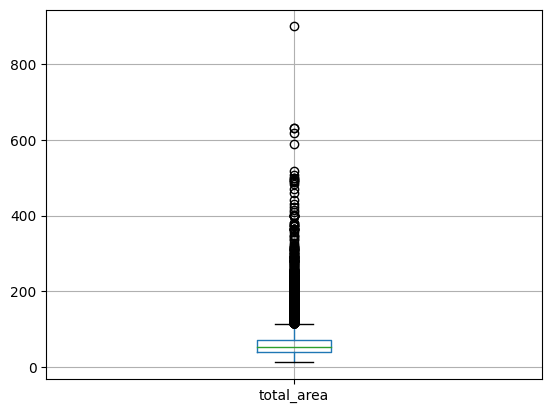

In [64]:
data.boxplot('total_area');

Данные с общей площадью имеют сильные выбросы, избавимся от них.

In [65]:
def clear_data(data, criteria):
    
    IQR = data[criteria].quantile(0.75) - data[criteria].quantile(0.25)
    bottom_threshold = data[criteria].quantile(0.25) - 1.5 * IQR
    if bottom_threshold < 0:
        bottom_threshold = 0
    top_threshold = data[criteria].quantile(0.75) + 1.5 * IQR
    return data[(data[criteria] > bottom_threshold) & (data[criteria] < top_threshold)]

In [66]:
data = clear_data(data, 'total_area')

Построим гистограмму для очищенных значений.

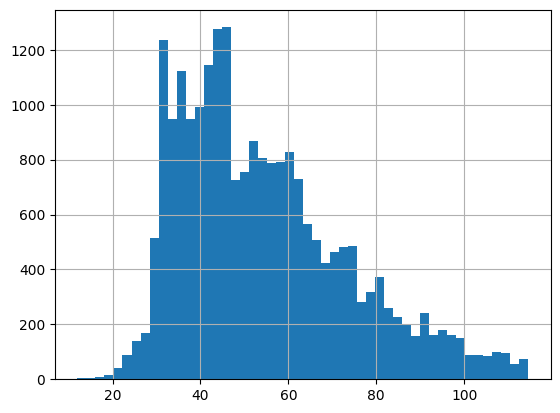

In [67]:
data['total_area'].hist(bins=50);

Получается, что в объявлениях чаще всего встречаются объекты с площадью около 40 кв.м.

#### Исследуем жилую площадь.

<Axes: >

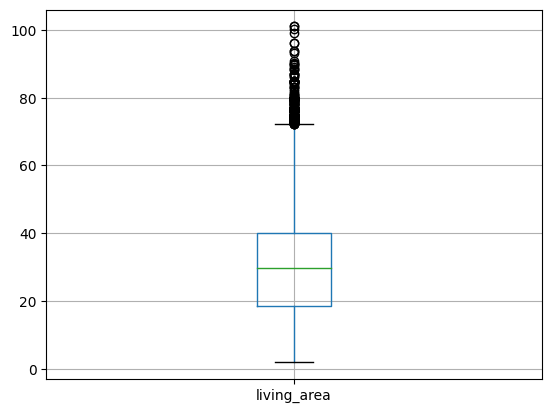

In [68]:
data.boxplot('living_area')

Избавимся от выбросов.

In [69]:
data = clear_data(data, 'living_area')

Построим гистограмму для очищенных значений.

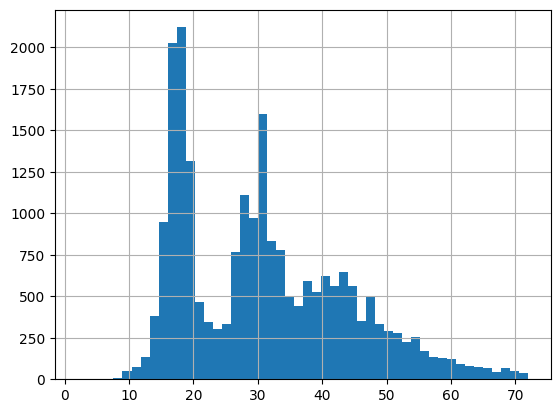

In [70]:
data['living_area'].hist(bins=50);

На гистограмме видны 3 пика: чуть меньше 20, 30 и чуть больше 40 кв.м.

#### Исследуем площадь кухни.

<Axes: >

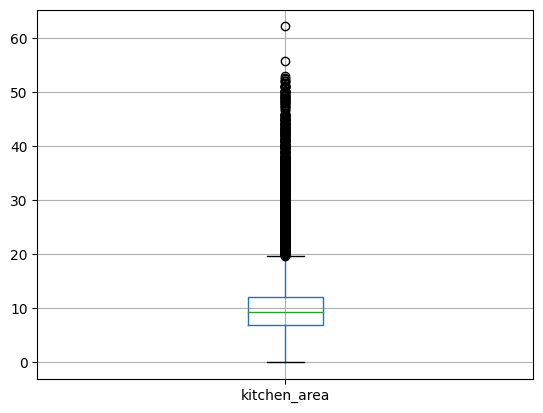

In [71]:
data.boxplot('kitchen_area')

Избавимся от выбросов.

In [72]:
data = clear_data(data, 'kitchen_area')

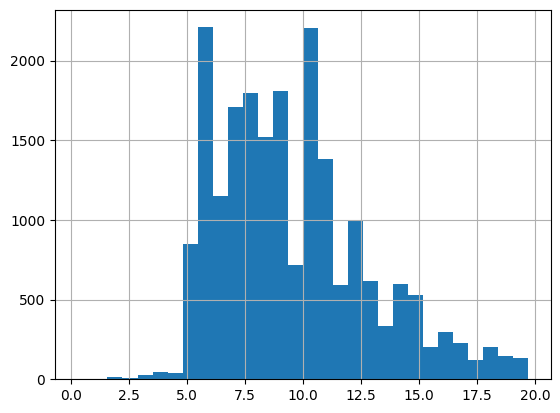

In [73]:
data['kitchen_area'].hist(bins=30);

Больше всего объявлений с площадью кухни до 10 кв.м.

#### Исследуем цену объектов.

<Axes: >

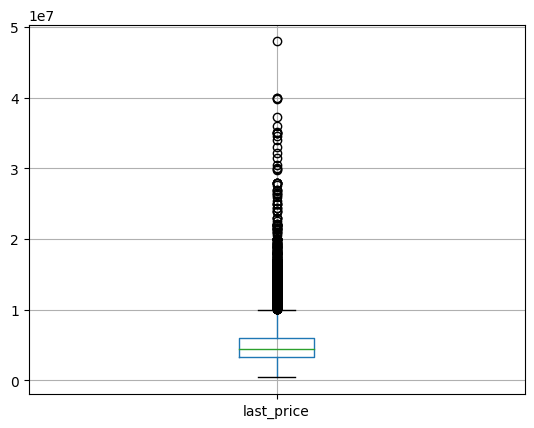

In [74]:
data.boxplot('last_price')

Избавимся от выбросов.

In [75]:
data = clear_data(data, 'last_price')

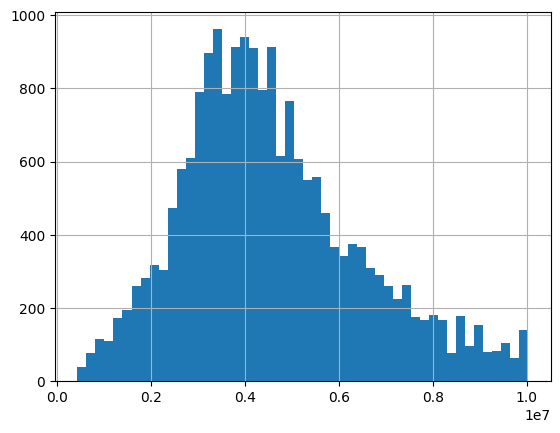

In [76]:
data['last_price'].hist(bins=50);

В большей части объявлений стоимость объектов от 2 до 6 млн рублей.

#### Исследуем кол-во комнат.

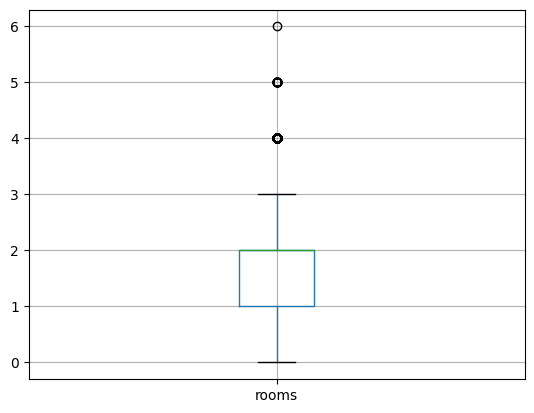

In [77]:
data.boxplot('rooms');

Оставим данные с выбросами без изменений.

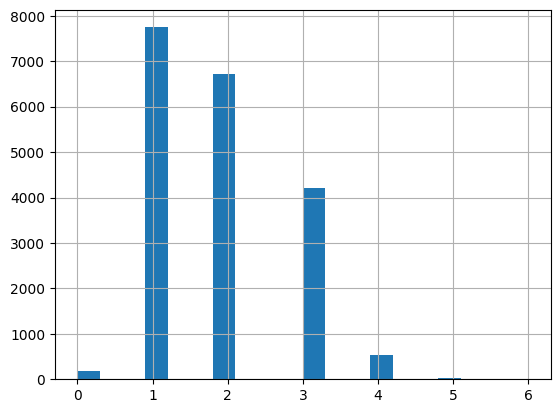

In [78]:
data['rooms'].hist(bins=20);

Болььшинство объектов это одно- и двухкомнатные квартиры, ричём их количество примерно равно.

#### Исследуем высоту потолков.

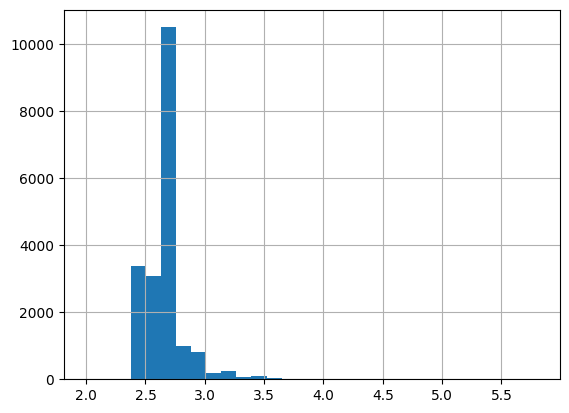

In [79]:
data['ceiling_height'].hist(bins=30);

Для большинства объектов характерна высота потолков от 2.5 до 3 м.

#### Исследуем этажи квартиры

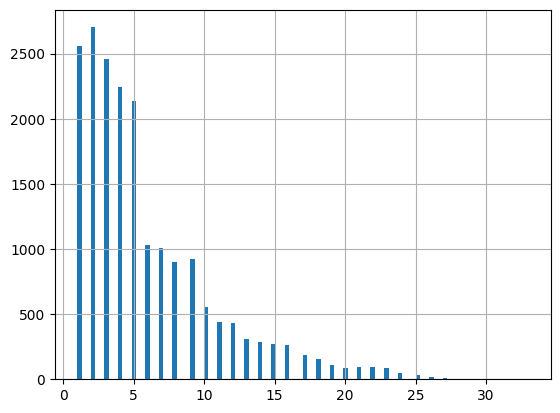

In [80]:
data['floor'].hist(bins=100);

Большая часть объектов находится не выще 5го этажа.

#### Исследуем тип этажа квартиры

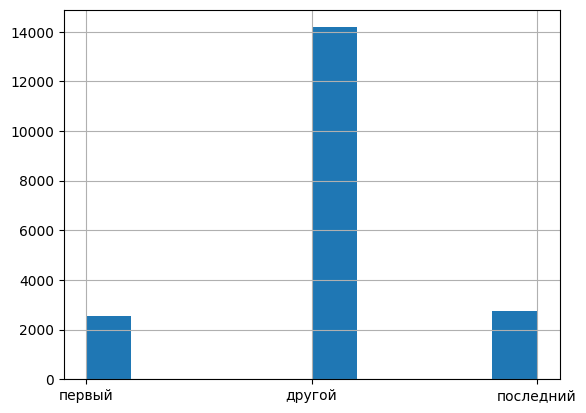

In [81]:
data['floor_type'].hist();

Объявлений на первом и последнем этажах значительно меньше, чем на других.

#### Исследуем общее количество этажей

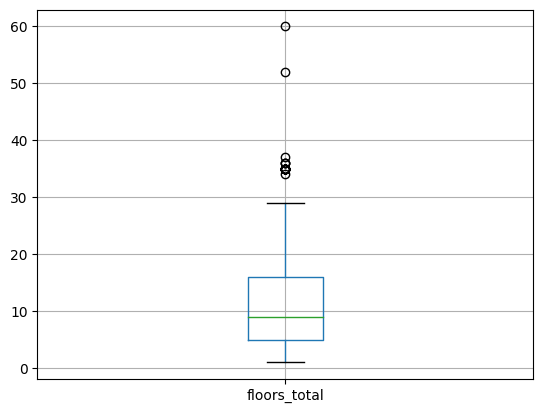

In [82]:
data.boxplot('floors_total');

Избавимся от выбросов.

In [83]:
data = clear_data(data, 'floors_total')

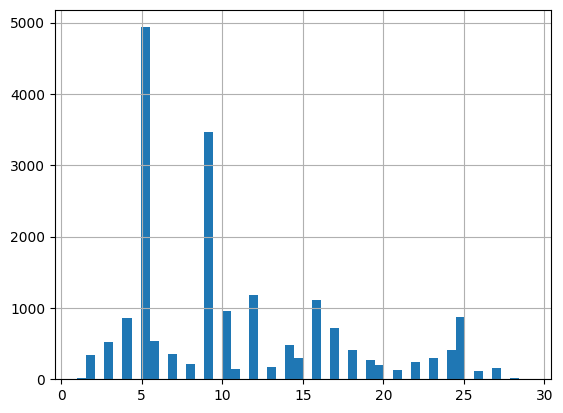

In [84]:
data['floors_total'].hist(bins=50);

Большинство объектов - это пятиэтажные здания.

#### Исследуем расстояние до центра города в метрах.

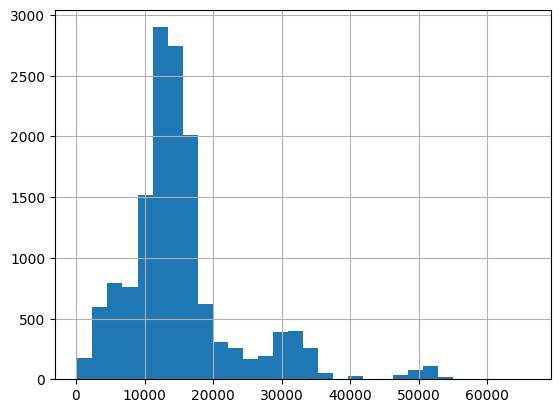

In [85]:
data['cityCenters_nearest'].hist(bins=30);

Большинство объектов находится на расстоянии от 10 до 20 км от центра города.

#### Исследуем расстояние до аэропорта в метрах.

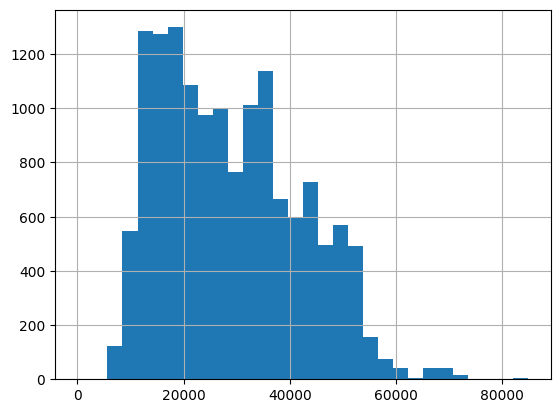

In [86]:
data['airports_nearest'].hist(bins=30);

Большинство объектов находится на расстоянии от 20 до 40 км от аэропорта.

#### Исследуем расстояние до до ближайшего парка.

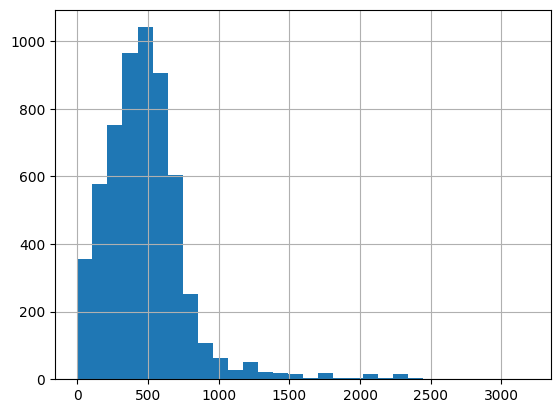

In [87]:
data['parks_nearest'].hist(bins=30);

В объявлениях, где есть информация о ближайших парках, объекты находятся чаще всего находятся на расстоянии 500 м от них.

#### Исследуем день и месяц опубликования объявлений.

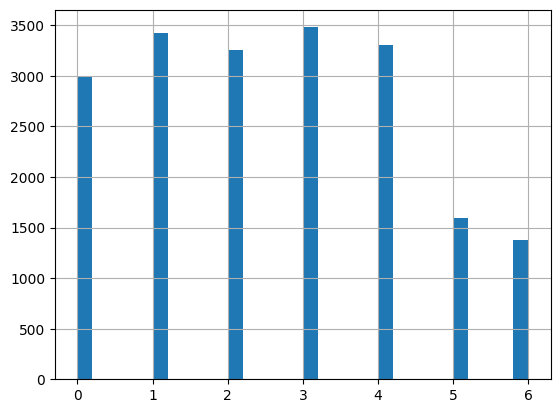

In [88]:
data['weekday'].hist(bins=30);

Чаще всего объявления публикуются в будние дни.

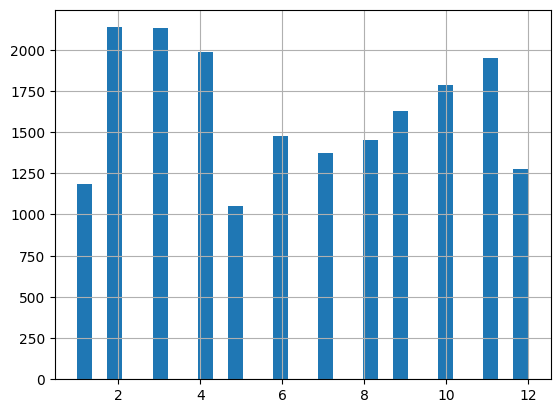

In [89]:
data['month'].hist(bins=30);

Реже всего объявления публикуют в январе, мае и декабре.

#### Изучим как быстро продавались квартиры.

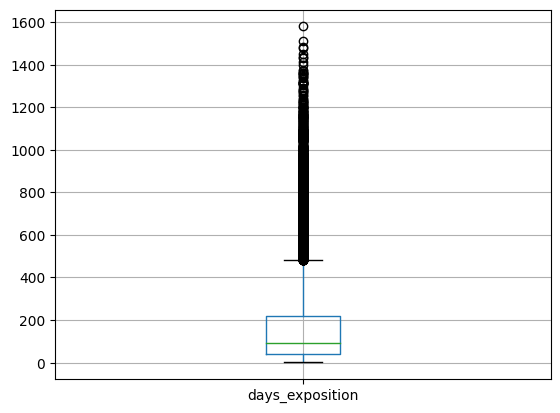

In [90]:
data.boxplot('days_exposition');

Избавимся от выбросов.

In [91]:
data = clear_data(data, 'days_exposition')

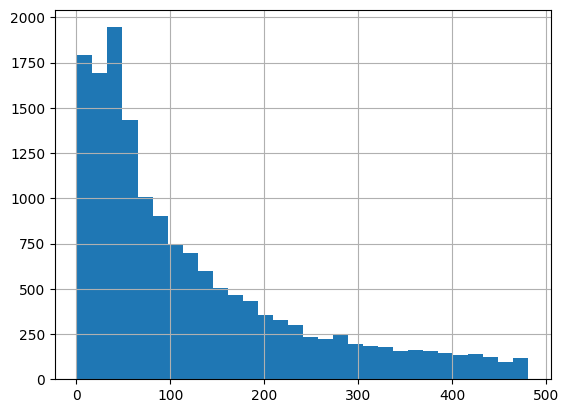

In [92]:
data['days_exposition'].hist(bins=30);

In [93]:
print('Среднее значение срока продажи квартиры', data['days_exposition'].mean(), 'дней')
print('Медианное значение срока продажи квартиры', data['days_exposition'].median(), 'дней')

Среднее значение срока продажи квартиры 122.13173996175908 дней
Медианное значение срока продажи квартиры 80.0 дней


Среднее значение отличается от медианного больше чем в 2 раза, из-за того что в данных есть объекты, которые стоят на продаже уже несколько лет.

Исходя из медианного значения продажи в срок до трёх месяцев могут считаться быстрыми, большое количество сделок завершается в срок до 50 дней.

#### Исследуем какие факторы влияют на стоимость объекта.

In [94]:
print('Медианное значение стоимости продажи квартиры', data['last_price'].median(), 'млн рублей.')

Медианное значение стоимости продажи квартиры 4200000.0 млн рублей.


##### Общая площадь

Посчитаем корреляцию общей площади со стоимостью для объектов с общей площадью до 200 кв.м.

In [95]:
data['last_price'].corr(data['total_area'])

0.6738955575639344

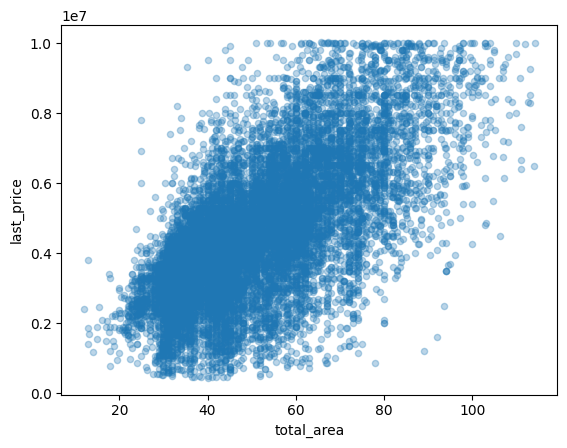

In [96]:
data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.3);

Фактор общей площади достаточно сильно влияет на стоимость объекта, хотя на графике можно наблюдать, что для объектов 60 кв.м. коридор стоимости составляет от 2 до 10 млн рублей.

##### Жилая площадь

In [97]:
data['last_price'].corr(data['living_area'])

0.5479464367345528

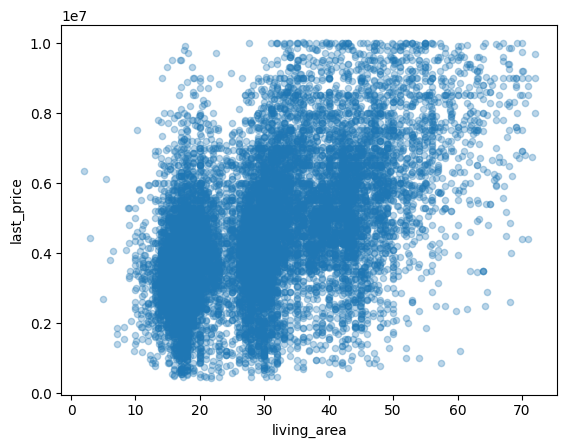

In [98]:
data.plot(x='living_area', y='last_price', kind='scatter', alpha=0.3);

Фактор жилой площади менее сильный, чем общая площадь, но закономерность похожа.

##### Площадь кухни

In [99]:
data['last_price'].corr(data['kitchen_area'])

0.3368951352737694

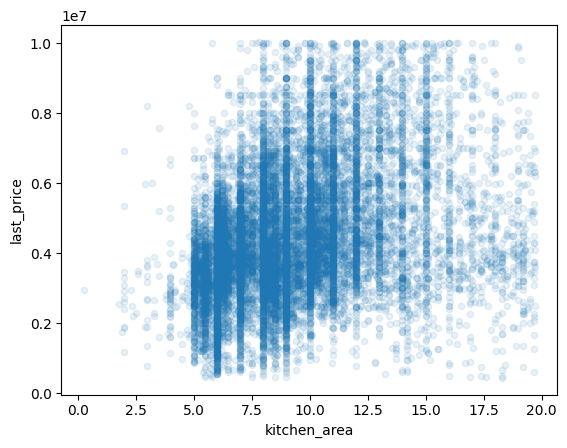

In [100]:
data.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.1);

Связь площади кухни со стоимостью очень слабая.

##### Количество комнат.

In [101]:
data['last_price'].corr(data['rooms'])

0.43887017193666206

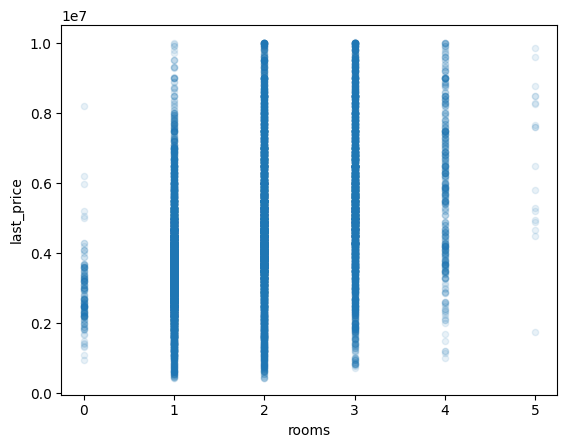

In [102]:
data.plot(x='rooms', y='last_price', kind='scatter', alpha=0.1);

Стоимость слабо связана с количеством комнат.

##### Этаж объекта.

In [103]:
data.pivot_table(index='floor_type', values='last_price', aggfunc=['median', 'mean'])

,median,mean
,last_price,last_price
floor_type,,
другой,4300000.0,4664169.0
первый,3690000.0,3877937.0
последний,3900000.0,4133841.5


Медианные и средние значения стоимости объектов на первом и последнем этажах ниже, чем на остальных.

##### День и месяц размещения на продажу

In [104]:
data['last_price'].corr(data['weekday'])

-0.010380255055488993

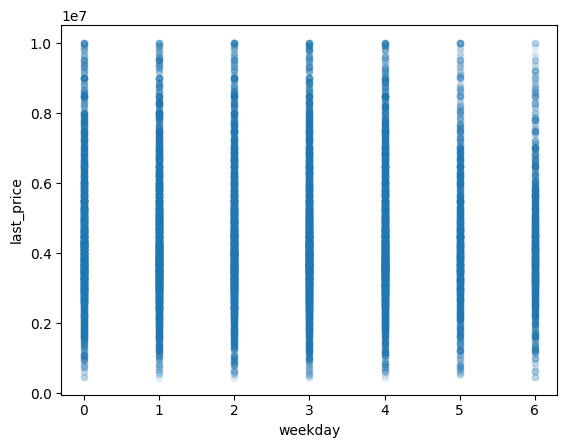

In [105]:
data.plot(x='weekday', y='last_price', kind='scatter', alpha=0.1);

Связь стоимости с днём публикации минимальна.

In [106]:
data['last_price'].corr(data['month'])

0.010011011585746101

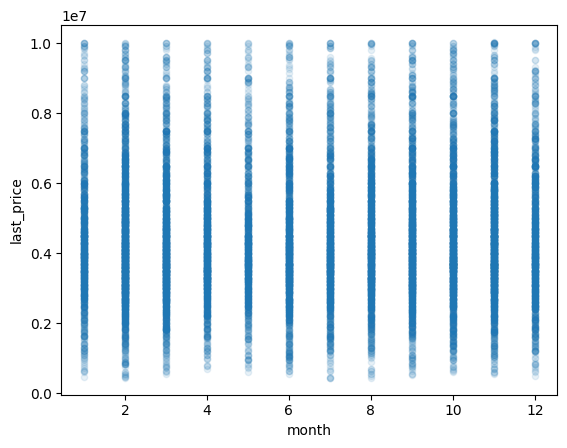

In [107]:
data.plot(x='month', y='last_price', kind='scatter', alpha=0.1);

Связь стоимости с месяцем публикации минимальна.

#### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [108]:
local_stats = data.pivot_table(index='locality_name', values='price_per_sqm', aggfunc=['mean', 'count'])
local_stats.columns = ['Средняя цена за кв.м.', 'Кол-во объявлений']
local_stats.sort_values('Кол-во объявлений', ascending=False).head(10)

,Средняя цена за кв.м.,Кол-во объявлений
locality_name,,
Санкт-Петербург,103593.367188,9977
посёлок Мурино,86387.406250,484
посёлок Шушары,78208.968750,355
Колпино,74544.570312,277
Всеволожск,66370.664062,277
посёлок Парголово,89615.921875,262
деревня Кудрово,93447.843750,233
Пушкин,98268.742188,232
Гатчина,68364.585938,230


#### Посчитаем как расстояние до центра в г. Санкт-Петербург влияет на стоимость объектов.

In [109]:
data[data['locality_name'] == 'Санкт-Петербург']['last_price'].corr(data['cityCenters_nearest_km'])

-0.31423267233488955

In [110]:
spb_km = data[data['locality_name'] == 'Санкт-Петербург'].pivot_table(index='cityCenters_nearest_km', values='last_price')
spb_km

,last_price
cityCenters_nearest_km,
0.0,6998333.50
1.0,7200844.00
2.0,7166959.00
3.0,6460153.50
4.0,6797313.50
5.0,6765726.00
6.0,6348532.50
7.0,6062947.00
8.0,5840528.00


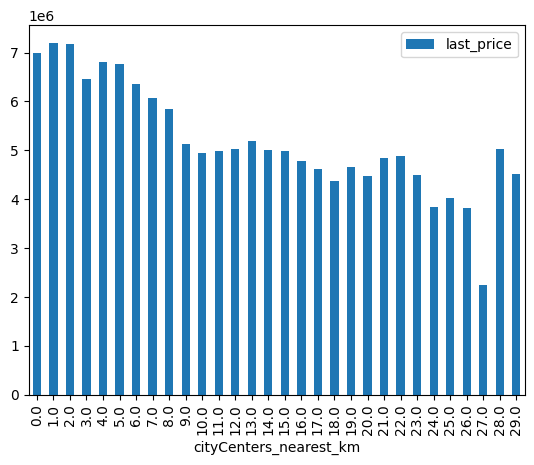

In [111]:
spb_km.plot(y='last_price', kind='bar');

Стоимость закономерно растёт, приближаясь к центру, хотя 28-й км примерно такой же постоимсти как 13-й. 

### Общий вывод

В ходе проделанной работы были изучены исходные данные и внесены следующие правки:
1. Устранены неявные дубликаты в названиях населённых пунктов.
1. Заполнены пропущенные данные в жилой площади  и площади кухни.
1. Пропуски в высоте потолков заполненые медианным значением.
1. Пропуски кол-ва этажей в здании были заполнены значениямиэтажей объектов.
1. Для пропущенных значений 'is_apartment' установлено False.
1. Для г. Санкт_петербург пропуски в значениях расстояний до аэропорта и центра города заполнены медианными значениями.

Данные были очищены от выбросов по значениям:
1. Стоимость объекта.
1. Общая площадь.
1. Жилая площадь.
1. Площадь кухни.
1. Срок размещения объявления.
1. Общее кол-во этажей.

В данные были добавлены дополнительные столбцы.
1. Цена за кв.м.
1. Растояние до центра в км.
1. Тип этажа объекта (первый, последний и другой).
1. День, месяц и год публикации объявление о продаже.

Далее был проведён исследовательский анализ параметров и были установлены следующие закономерности:
1. Около 2/3 продаваемых объектов находятся в г. Санкт-Петербург.
1. Медианное значение продажи квартиры составляет чуть больше 4 млн рублей.
1. Большинство объектов это одно- и двухкомнатные квартиры в пятиэтажных зданиях площадь отт 30 до 60 кв.м. на расстоянии от 10 до 20 км от центра и от 20 до 40 км о аэропорта.
1. Медианное значение срока продажи квартиры 92 дней.

Было также исследовано влияние факторов на стоимость квартир, наиболее сильно влияют общая площадь и расстояние до центра, влияние остальных факторов значительно меньше.

В конце были рассчитаны средние стоимости объектов для топ-10 населенных пунктов по количеству объявлений и посчитана средняя стоимость объектов для каждого километра до центра в г. Санкт-Петербург.